### Section I: Import the data

In [49]:
%matplotlib inline 

import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

In [61]:
mtcars = pd.read_csv("~/DSI-SF-5/curriculum/week-06/Clustering/assets/datasets/mtcars.csv")
mtcars.head()

,Car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


### Plot the Data

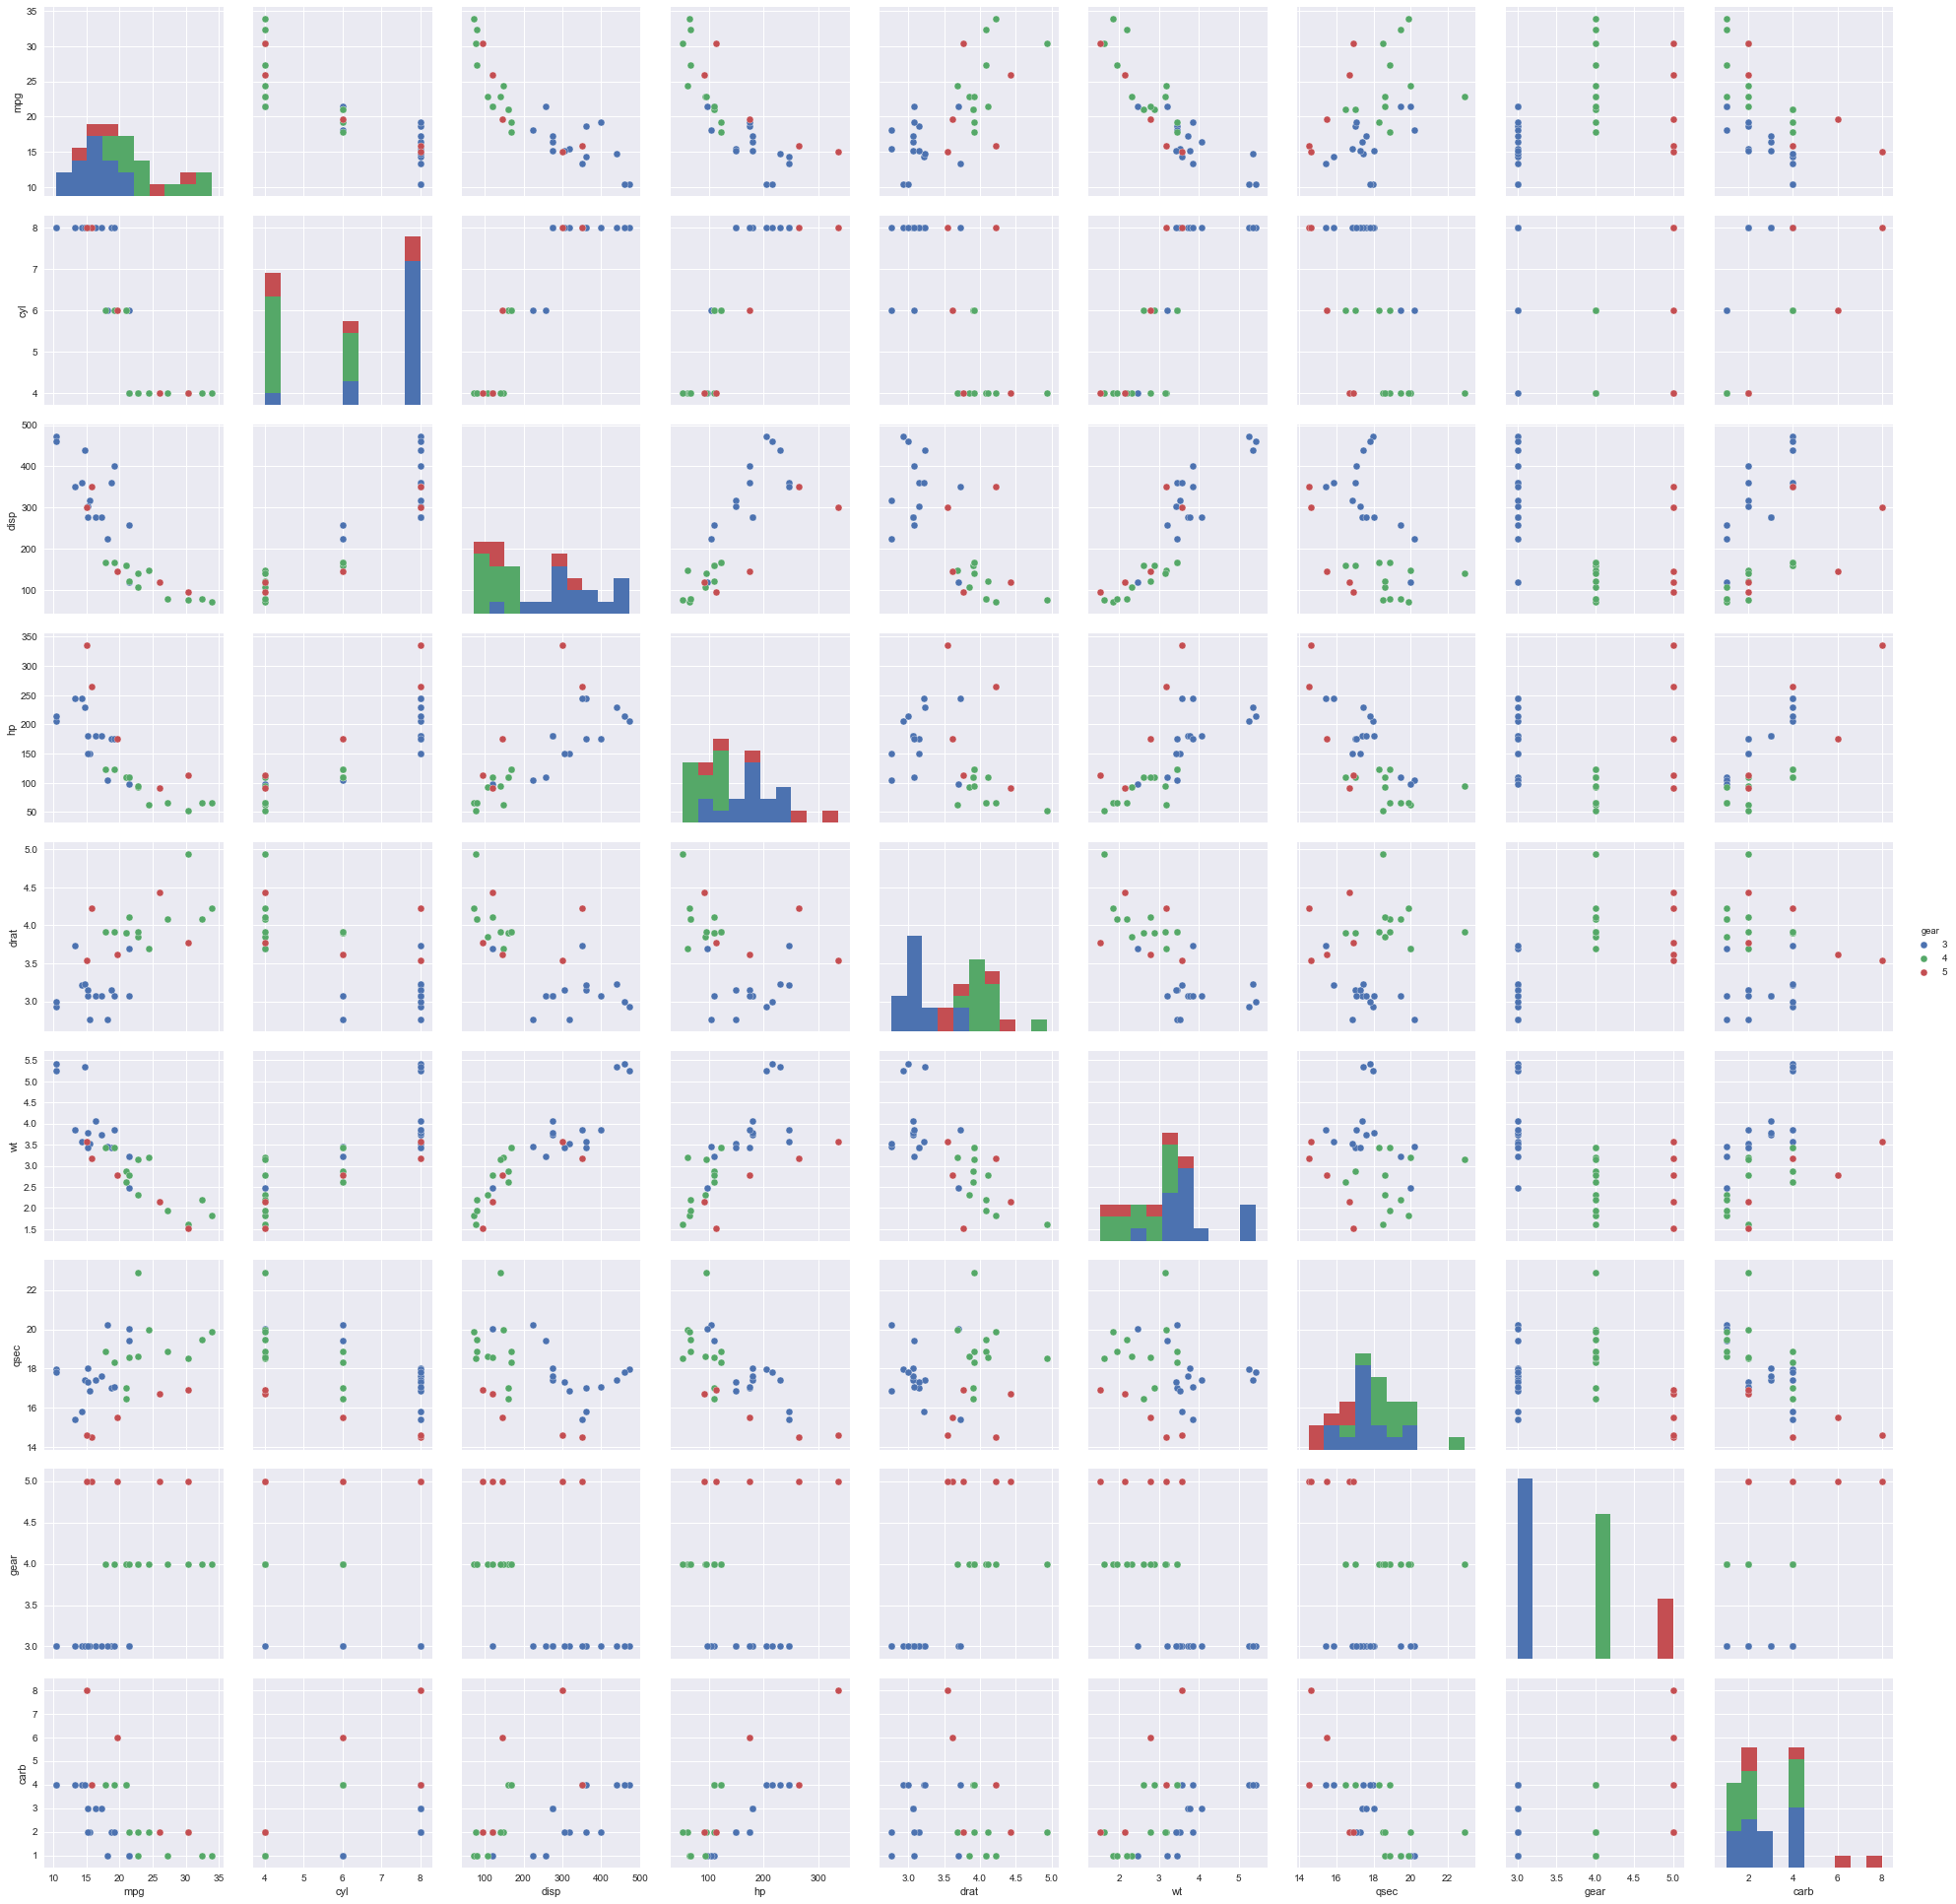

In [63]:
# let's exclude binary features
cols = [u'Car', u'mpg', u'cyl', u'disp', u'hp', u'drat', u'wt', u'qsec', u'gear', u'carb']
sb.pairplot(mtcars[cols], hue="gear", size=3);

Hmm... the discrete features lead to distributions that would not cluster well. Let's also remove those features from the dataset. 

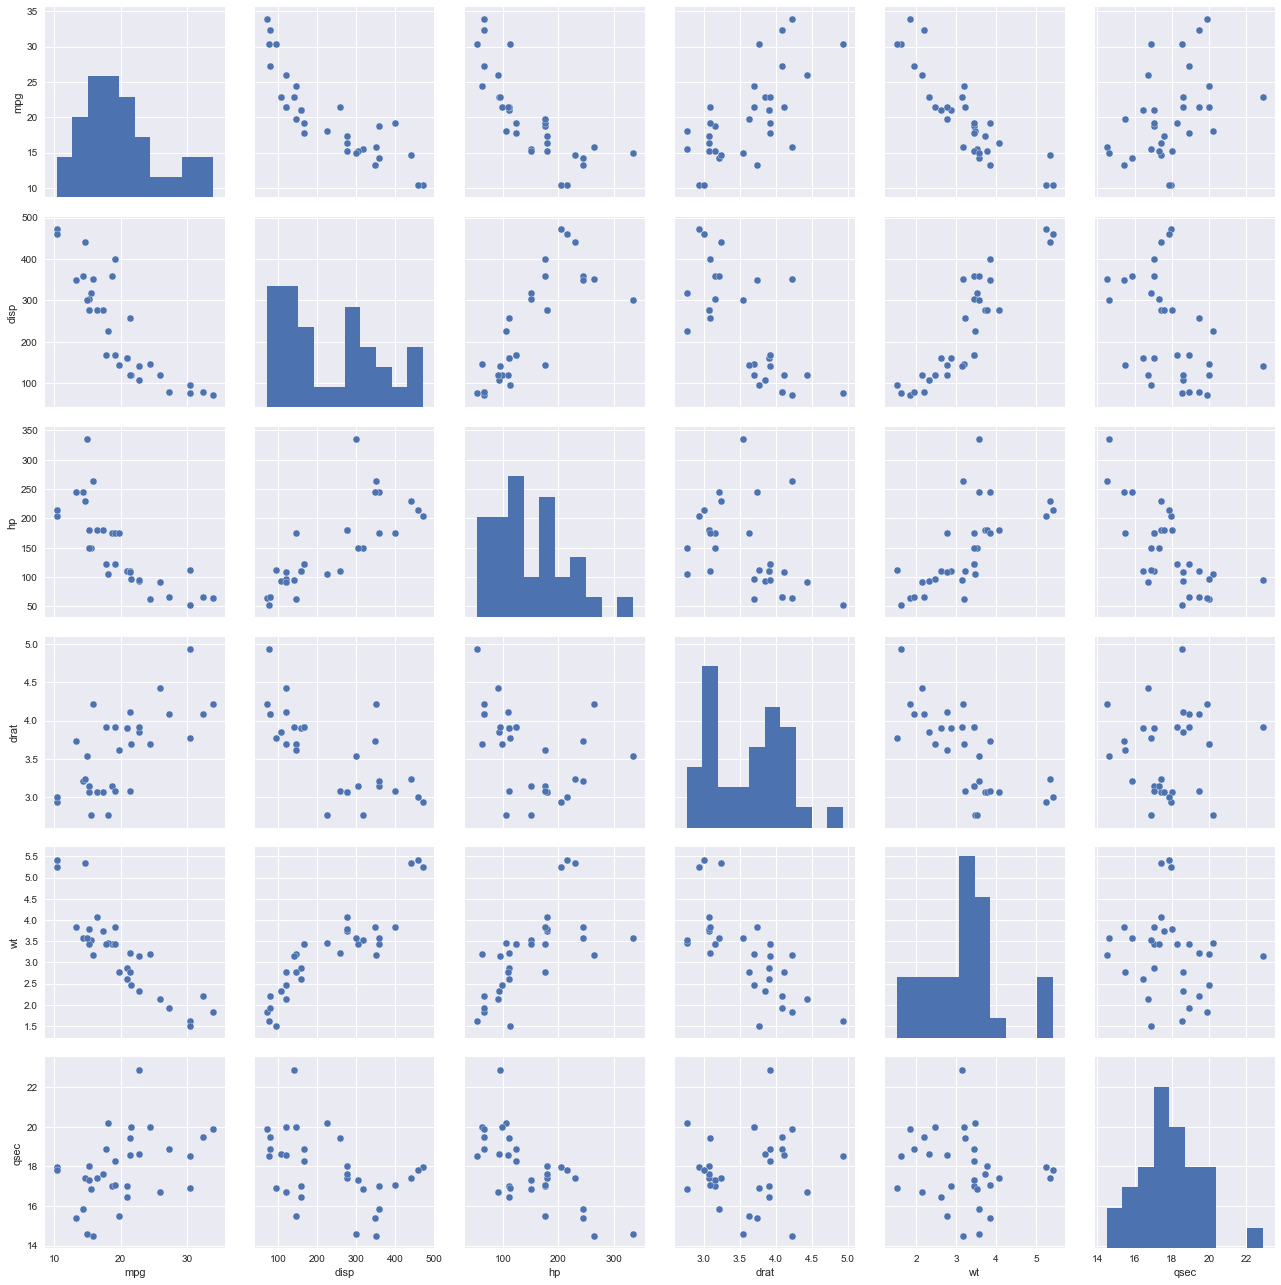

In [67]:
cols = [u'Car', u'mpg',  u'disp', u'hp', u'drat', u'wt', u'qsec']
sb.pairplot(mtcars[cols], size=3);

### Extract the features you to use in clustering into a matrix

In [71]:
X = mtcars[[ u'mpg',  u'disp', u'hp', u'drat', u'wt', u'qsec']]

### Cluster the data using K-Means Clustering

Cluster two of the variables of your choice. Choose K based on your plots and the behavior of the data

In [74]:
from sklearn.cluster import KMeans
cluster_model = KMeans(n_clusters = 2)
cluster_model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

### Find the Silhoutte Score and plot the features and clusters

In [75]:
from sklearn.metrics import silhouette_score

silhouette_score(X, cluster_model.labels_, metric='euclidean')

0.6285408209669785

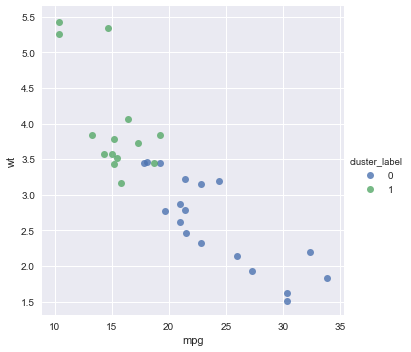

In [76]:
mtcars['cluster_label'] = cluster_model.labels_

sb.lmplot(
    x = 'mpg',
    y = 'wt',
    hue = 'cluster_label',
    data = mtcars,
    fit_reg=False
);

### Cluster the data using K-Means Clustering

Choose two of the variables of your choice to cluster. 

1. Create a list of K values ranging from 1 to 10
2. Fit KMeans for every K value iteratively
3. In each iteration, store the Silhoutte score in a list and the inertial in a list (inertial: sum of distances of samples to their closest cluster center)
4. Plot a Inertial vs. Cluster Number plot
5. Which K values leads to the best performance?

In [100]:
X2 = X[['mpg', 'disp']]

In [105]:
k_range = range(2,10)
sil_list = []
WCSS_list = []
for k in k_range:
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X2)
    
    cluster_labels = kmeans.labels_
    
    sil_score = metrics.silhouette_score(X2, cluster_labels)
    sil_list.append(sil_score)
    
    wcss = kmeans.inertia_
    WCSS_list.append(wcss)

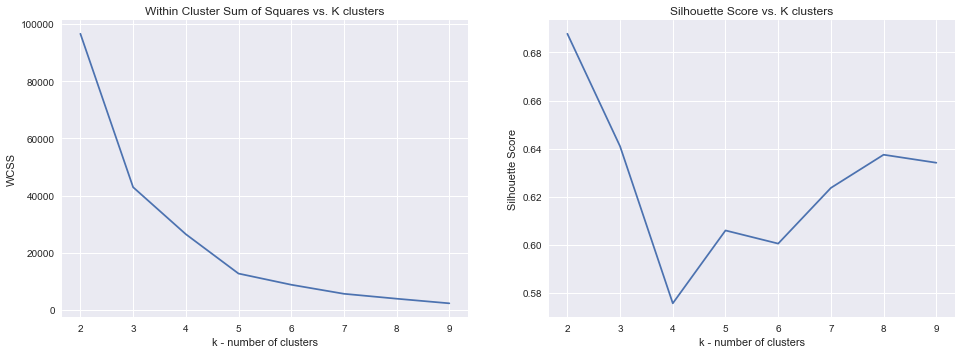

In [106]:
fig = plt.figure(figsize = (16,12))
fig.add_subplot(221)
plt.plot(k_range, WCSS_list)
plt.title("Within Cluster Sum of Squares vs. K clusters");
plt.ylabel("WCSS")
plt.xticks(k_range)
plt.xlabel("k - number of clusters");

fig.add_subplot(222)
plt.plot(k_range, sil_list)
plt.xticks(k_range)
plt.title("Silhouette Score vs. K clusters");
plt.ylabel("Silhouette Score")
plt.xlabel("k - number of clusters");

### Interpretation 

I choose 'mpg' and 'disp' features to cluster on and these are my Within Cluster Sum of Square Distance and Silhouette Score plots. 

We can see that WCSS continuously decreases as the number of clusters increases. This is expected. What if we increase the number of clusters to the same number of data points in the dataset? Then each point would be its own cluster and the WCSS would be at the lowest value possible -- but that result is useless. Also assigning all points to one of 2 cluster leads to very high WCSS, so we need to find an optimum number of clusters somewhere in the middle. 

One method of to use the **Elbow Method**. This heuristic is a common way to determine the optimum K. Check out the [Wiki on the elbow method](https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set) . This method essentially states that the optimum K occurs when the decrease in WCSS from cluster $K{i}$ to $K_{i+1}$ reaches a point of diminishing returns. We see that the WCSS decreases rapidly from 2 to 5 clusters, then decreases at a slower rate beyond 5 cluster. For this reason we conclude that, based on the WCSS plot alone, the optimum number of clusters is 5. 

Next let's look at the Silhouette Score plot. We can see that all scores exist within the range between 0.57 and 0.69. The score is hightest at K = 2, lowest at K = 4, and climbs up again to a local max at K = 8. We need to reconcile what both plots are telling us. Fortunately, in this case, both plots complement each other well enough. The WCSS plot states that the optimum K is 5 and the Silhouette Score plot says that K=5 leads to a local maximum in the silhouette score which is a reasonable score. If however K = 5 lead to a terribly low silhouette score, then we'd have to consider what are options are to improve the performance of Kmeans. 

#### Conclusion

Based on the features that I selected, the optimum number of clusters is 5. 